# Coding Project: Watermark

The add_watermark function, is a function that adds automatically a watermark to an image. This function takes up to 4 arguments.
- The first argument is the name of the file that includes the image, this argument is necessary and should be a string.
- The second argument is the opacity of the watermark which is set by default to 70 but can be changed by the user. The transparency effect of the watermark was created by adding the opacity argument value to each pixel in the image where the mask is applied. We know that a white color is the mix of the 3 RGB colors with a value of 255 for each. Adding a certain opacity value to a pixel in the image will then increase its brightness and gives a transparency effect for the watermark. This is also applicable for a dark color watermark, but instead of adding the opacity value, we will deduce it because again a black color is given by the mix of the 3RGB colors with a 0 value for each, therefore decreasing a pixel value will decrease its luminosity. 
- The third argument is the luminosity of the watermark: this one is set by default based on the luminosity of the image, but can be changed by the user to bright $'b'$ or to dark $'d'$.
- The last argument, takes the position of the watermark, this one is set by default in the center of the image but can be also modified to 5 different positions:
 - 4 pre-set positions which are Left Up Corner 'luc' , Right Up Corner 'ruc' , Left Down Corner 'ldc' and Right Down Corner 'rdc'
 -  a random position given by the user and which takes a tuple $(y_{position}, x_{position})$ as an argument 

In case the user wants to put the watermark in a bright image and the position chosen by the user is a dark part of the image, the luminosity of the watermark will be automatically modified to brighter even if the image is bright. This will help in the visibility of the watermark. But again if the non visibility of the watermark is the user's choice, this one can still set his prefered watermark luminosity.


The following code is the add_watermark function which is based on 3 sub-functions: 
- the mask_ function which transforms the logo that we want to set as a watermark to a mask
- the is_bright function that determines the brightness of the image based on the value of the HSV reprensentation of the image (if the image is bright it returns (1,0), if it's dark the returned value is (0,1))
- the position function that dermines the position of the watermark 

Some examples of different images, in different cases will be shown right after the following code.

In [25]:
from skimage.io import imread,imsave,imshow
from skimage.color import rgb2hsv
from matplotlib import pyplot as plt
import numpy as np

def mask_(im,coords,tol):
    refcolor=im[coords[0],coords[1]]
    dmap=np.sqrt(((im-refcolor)**2).sum(axis=2))
    dmap/=dmap.max()
    mask=dmap>tol
    return mask

def is_bright(im):
    
    result=(1,0)
    hsv= rgb2hsv(im)
    d_h = np.abs(hsv[:,:,2])
    dark_val= (hsv[:,:,2]<0.5).sum()
    bright_val= (hsv[:,:,2]>=0.5).sum()
    
    if(dark_val>bright_val): result=(0,1)
        
    return result

def position_(im,p,addy,addx):
    
    if p==0: (yc,xc)=(im.shape[0]//2,im.shape[1]//2)
        
    elif p=='ldc': (yc,xc)=(im.shape[0]-(addy//2),addx)
        
    elif p=='rdc':(yc,xc)=(im.shape[0]-(addy//2),im.shape[1]-addx)
        
    elif p=='luc':(yc,xc)=(addy//2,addx)
        
    elif p=='ruc':(yc,xc)=(addy//2,im.shape[1]-addx)
        
    else: 
        yc=int(p[0])
        xc=int(p[1])
    
    return (yc,xc)
    
def add_watermark(im,opacity=70,luminosity=0,position=0):
    
    im=imread(im)
    logo = imread('ulb.jpg')
    coords=(290,290)
    tol=0.3
    
    mask=mask_(logo.astype('float'),coords,tol)

    im_copy=im.copy()  #to modify the copy and not the original image
    
    (addy,addx)=(mask.shape[0]//2,mask.shape[1]//2)
    
    (yc,xc)=position_(im,position,addy,addx)
        
    (yf,xf)=(yc+addy,xc+addx)
    
    #avoiding an overflow error in case the position choosed by the user is in the extrem corner of the image 
    if (yf>im.shape[0]): yf=im.shape[0]-1
    if (xf>im.shape[1]): xf=im.shape[1]-1
        
    #setting of the luminosity of the watermark
    if luminosity=='d': (i,j)=(1,0) 
    elif luminosity=='b': (i,j)=(0,1) 
    else : 
        (i,j)=is_bright(im)
    
    #setting in case the luminosity of the watermark position is different than the luminosity of the image
    window=im[yc-addy:yf,xc-addx:xf] 
    if (is_bright(window)!=(i,j) and luminosity !='d' and luminosity !='b'): (i,j)= is_bright(window)
    
    #changing the color of the pixels of the image by modifying the RGB value in the image, based on the mask 
    for y in range (yc-addy,yf,1):
        for x in range(xc-addx,xf,1):
            pixel_val= mask[y-(yc-addy),x-(xc-addx)]
            if ((pixel_val==0).any()):
                for color in range(3):
                    total_pixel=im_copy[y,x,color]+(((-1)**i)*opacity)
                    if (total_pixel<0 or total_pixel>255): total_pixel=(0**i)*(255**j)
                    im_copy[y,x,color]=total_pixel
    
    imsave('imagelogo.jpg',im_copy) #save image
    
    return im_copy

### Adaptibility to the image brightness

Here we will put the watermark respectively in a bright image and in a dark image. The brightness of the watermark will be automatically choosen based on the brightness of the image. We expect to have a dark watermark for the bright image and a bright watermark for the dark image:

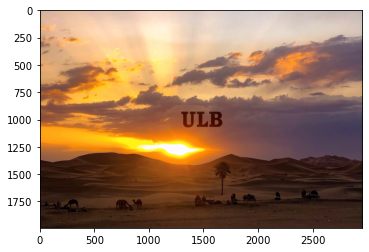

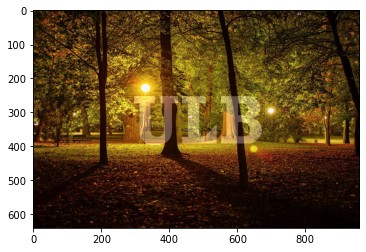

In [26]:
image_b = add_watermark('sunrise.jpg')
image_d = add_watermark('night.jpg')

plt.figure()
plt.imshow(image_b)
plt.figure()
plt.imshow(image_d)
plt.show()

We can also increase the opacity of the watermark to have it more visible:

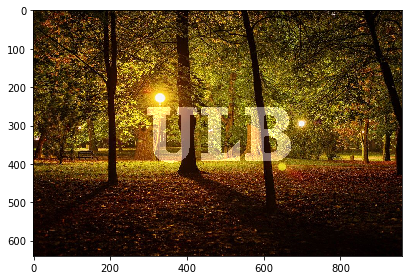

In [10]:
image_db= add_watermark('night.jpg',100)
imshow(image_db)

### Changing the brightness of the watermark
Here we will modifiy the brightness of the watermark in the dark image by setting it to dark:

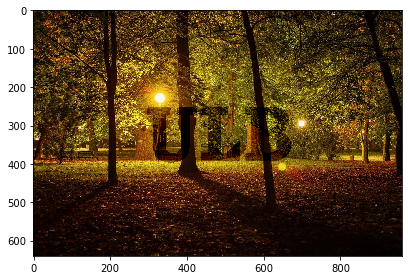

In [38]:
image_db= add_watermark('night.jpg',70,'d')
imshow(image_db)

### Changing the position of the watermark 

We can also change the position of the watermark. Let's put the watermark in the left up corner of the sunrise image:
this only requires to set the position argument to 'luc'.

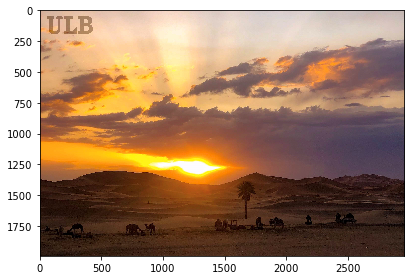

In [39]:
image_position = add_watermark('sunrise.jpg',70,0,'luc')
imshow(image_position)

We can also move the watermark to the right down corner. Even if the sunrise image is brighter than the right down corner of the image, the luminosity of the watermark will be set automatically to the luminosity of the corner without having to change the luminosity argument in our function:

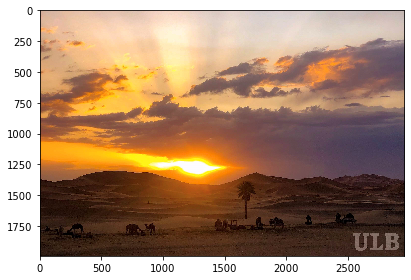

In [28]:
image_position = add_watermark('sunrise.jpg',70,0,'rdc')
imshow(image_position)

Another example of the adaptability of the luminosity of the watermark based on both the image and the position of the watermark:

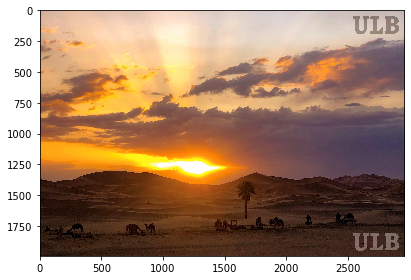

In [29]:
image_position2= add_watermark('imagelogo.jpg',70,0,'ruc')
imshow(image_position2)

##### What happens when the users sets a position that is in the extrem corner of the image?  
No overflow error and the watermark is still put in the position wanted.

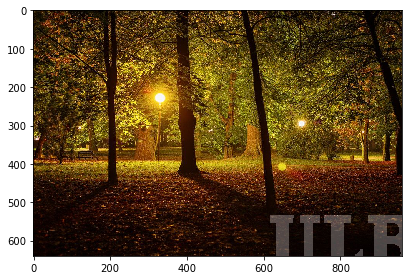

In [30]:
image_corner = add_watermark('night.jpg',70,0,(600,800))
imshow(image_corner)